# "How many waveforms do I need?" 
Understanding how the architecture of seismic datasets affects the performance of deep learning models for automated phase-picking.

The use of deep learning (DL) in earthquake detection and phase-picking tasks has produced transformative results in recent years. Driven by large seismic datasets, DL pickers hold much promise in improving the accuracy of automated picks. However, the regionalization of seismic velocity and attenuation models makes the application of pre-established phase pickers to new target regions challenging if the input seismic data distribution is not reflected in the original training datasets. Furthermore, transfer learning of DL pickers may not be possible due to the lack of reliable human-reviewed waveforms for training. Perhaps the greatest challenge is that seismologists have no a priori knowledge of the number of waveforms required for model training to achieve their desired phase-picking accuracy and model residuals, or which proposed DL pickers can be applied directly to a new target region without re-training. In this study, we explore the issues of DL model performance by investigating the effect of increasing training sample sizes and examining different deployment settings applied to new data. To this end, we retrain two of the most popular DL pickers, PhaseNet and EQTransformer, using training datasets of various size and then test the phase picking accuracy with the same validation set. From this study, we gain insight into how many waveforms should be included in a new DL project and which additional factors (e.g., data preprocessing and standardization, picking method, tectonic setting, etc.) might affect training and model performance. Our study provides a guide for determining the optimal size of the training data set and model selection for future studies.


### Authors

- Hao Mai, Department of Earth and Environmental Sciences, University of Ottawa, Ottawa, Canada - [Email](mailto:hmai090@uottawa.ca)
- Pascal Audet, Department of Earth and Environmental Sciences, University of Ottawa, Ottawa, Canada
- H.K. Claire Perry, Canadian Hazards Information Service, Natural Resources Canada, Ottawa, Canada
- Clément Estève, Department of Meteorology and Geophysics, University of Vienna, Vienna, Austria

### Citation

If you find this work useful in your research, please consider citing our paper:

Mai, H., Audet, P., Perry, H.K.C., Mousavi, S.M., & Zhang, Q. (2023). Blockly earthquake transformer: A deep learning platform for custom phase picking. Artificial Intelligence in Geosciences. https://doi.org/10.1016/j.aiig.2023.05.003

```bibtex
@article{mai2023blockly,
  title={Blockly earthquake transformer: A deep learning platform for custom phase picking},
  author={Mai, Hao and Audet, Pascal and Perry, H.K. Claire and Mousavi, S. Mostafa and Zhang, Q},
  journal={Artificial Intelligence in Geosciences},
  year={2023},
  doi={10.1016/j.aiig.2023.05.003}

# Install required packages

In [1]:

!pip install numpy pandas matplotlib scikit-learn seaborn pygmt

  Using cached pygmt-0.9.0-py3-none-any.whl (393 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 9.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 17.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 5.4 MB/s eta 0:00:00


# Import required packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import seaborn as sns
from pathlib import Path

In [4]:
sns.set(font_scale=1.5)
sns.set_style("ticks")

These two lines of code are used to set the font size and style of the Seaborn plots. 

The first line, `sns.set(font_scale=1.5)`, sets the font scale of the plot to 1.5 times the default font size. This means that all text in the plot, including axis labels, tick labels, and legend labels, will be 1.5 times larger than the default size.

The second line, `sns.set_style("ticks")`, sets the style of the plot to "ticks". This style removes the top and right spines of the plot, leaving only the bottom and left spines, and adds ticks to the top and right sides of the plot. This style is useful for creating clean and simple plots.

Note that these lines of code require the Seaborn library to be imported and initialized in the code. 



# Determining how many waveforms are required for the model training in order to achieve their desired phase-picking accuracy

## Receiver Operating Characteristic (ROC) Curve


In [12]:

# read a group of predictions
split = 'dev'
preds = []
fprs = []
tprs = []
auc_values = []
for results_path in [
"/Users/hao/Documents/Package/How-many-samples-do-we-need/pred/mackenzie_phasenet/version_3",
 "/Users/hao/Documents/Package/How-many-samples-do-we-need/pred/mackenzie_phasenet/version_7",
  "/Users/hao/Documents/Package/How-many-samples-do-we-need/pred/mackenzie_eqtransformer/version_3",
  "/Users/hao/Documents/Package/How-many-samples-do-we-need/pred/mackenzie_eqtransformer/version_0",
 
]:
    pred = pd.read_csv(f"{results_path}/{split}_task1.csv")
    pred["trace_type_bin"] = pred["trace_type"] == "earthquake"
    preds.append(pred)
    fpr, tpr, _ = roc_curve(pred["trace_type_bin"], pred["score_detection"])
    # 计算AUC
    roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)
    fprs.append(fpr)
    tprs.append(tpr)
print(auc_values)

[0.9174852166781977, 0.9762977067525084, 0.5683963687316851, 0.9796869162874303]


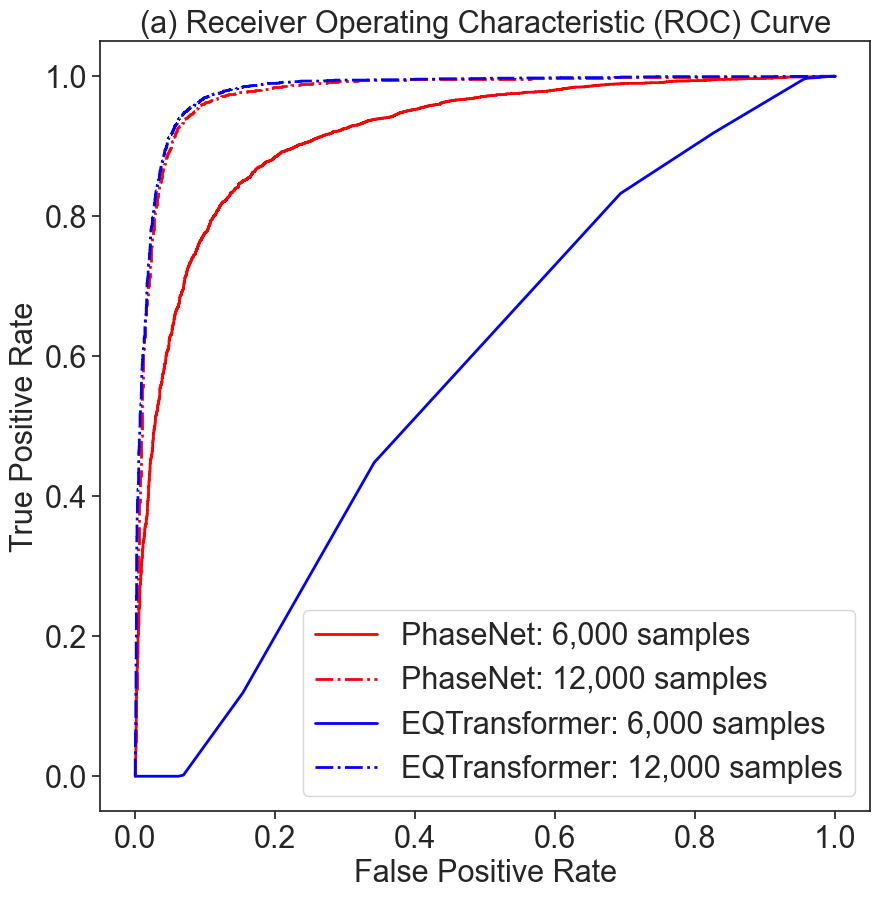

In [33]:
label_names = [
    "PhaseNet: 6,000 samples",
    "PhaseNet: 12,000 samples",

    "EQTransformer: 6,000 samples",
    "EQTransformer: 12,000 samples",
]
fig = plt.figure(figsize=(10, 10))
# Set font size
plt.rcParams.update({'font.size': 22})
ax = fig.add_subplot(111)
i = 0
ax.plot(fprs[i], tprs[i], label=label_names[0], linestyle="-", color="red", linewidth=2)

i = 1
ax.plot(fprs[i], tprs[i], label=label_names[1], linestyle="-.", color="red", linewidth=2)

i = 2
ax.plot(fprs[i], tprs[i], label=label_names[2], linestyle="-", color="blue", linewidth=2)

i = 3
ax.plot(fprs[i], tprs[i], label=label_names[3], linestyle="-.", color="blue", linewidth=2)
ax.set_aspect("equal")
ax.legend(loc='lower right')
# set legend font size
ax.legend(prop={'size': 22})
# set x,y label font size
ax.set_xlabel('False Positive Rate', fontsize=22)
ax.set_ylabel('True Positive Rate', fontsize=22)
# Set tick font size
ax.tick_params(axis='both', which='major', labelsize=22)
# set title font size
ax.set_title('(a) Receiver Operating Characteristic (ROC) Curve', fontsize=22)
# save figure
fig.savefig('ROC.png', dpi=500, bbox_inches='tight')



## Precision-Recall Curve

In [34]:
# read a group of predictions
precs = []
recals = []
best_f1s = []
f1_thresholds = []
for results_path in [
"/Users/hao/Documents/Package/How-many-samples-do-we-need/pred/mackenzie_phasenet/version_3",
 "/Users/hao/Documents/Package/How-many-samples-do-we-need/pred/mackenzie_phasenet/version_7",
  "/Users/hao/Documents/Package/How-many-samples-do-we-need/pred/mackenzie_eqtransformer/version_3",
  "/Users/hao/Documents/Package/How-many-samples-do-we-need/pred/mackenzie_eqtransformer/version_0",
]:
    pred = pd.read_csv(f"{results_path}/{split}_task23.csv")
    pred["phase_label_bin"] = pred["phase_label"] == "P"

    prec, recall, thr = precision_recall_curve(pred["phase_label_bin"], pred["score_p_or_s"])

    f1 = 2 * prec * recall / (prec + recall)
    f1_threshold = thr[np.nanargmax(f1)]
    best_f1 = np.max(f1)
    precs.append(prec)
    recals.append(recall)
    best_f1s.append(best_f1)
    f1_thresholds.append(f1_threshold)


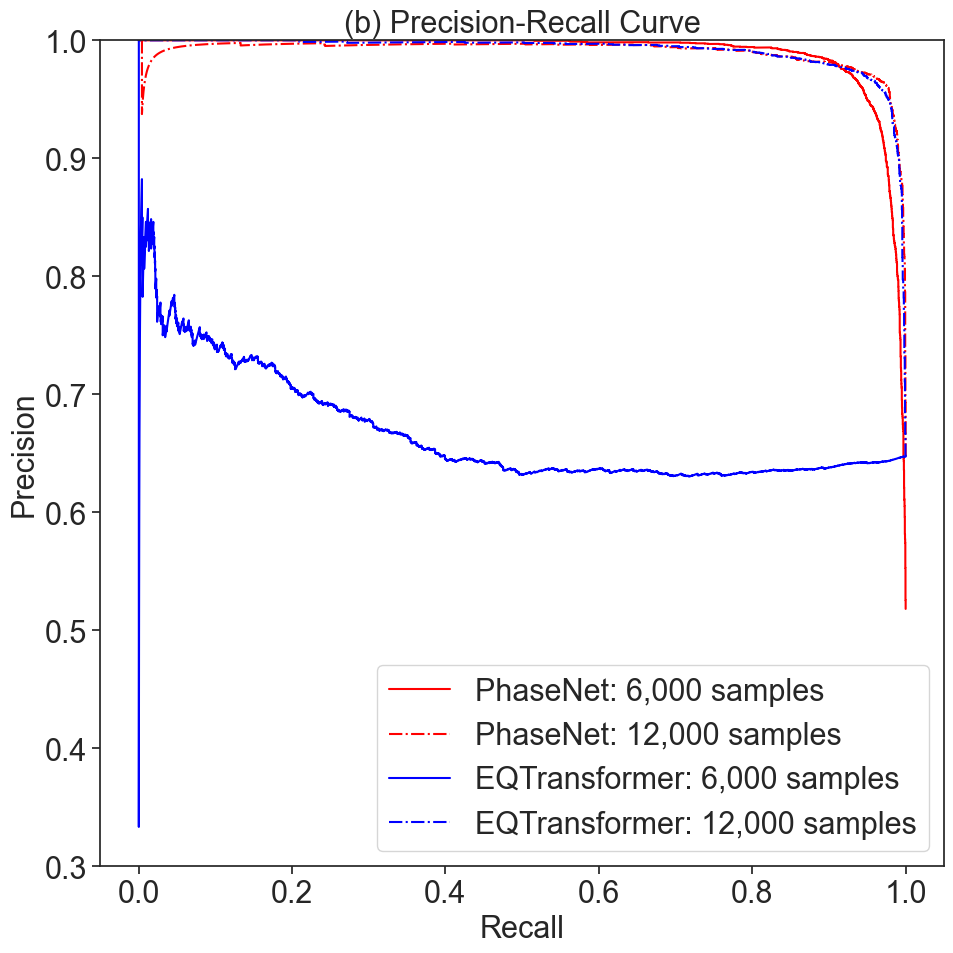

In [35]:
label_names = [
    "PhaseNet: 6,000 samples",
    "PhaseNet: 12,000 samples",
    "EQTransformer: 6,000 samples",
    "EQTransformer: 12,000 samples",
]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
i = 0
ax.plot(recals[i], precs[i], label=label_names[0], linestyle="-", color="red")

i = 1
ax.plot(recals[i], precs[i], label=label_names[1], linestyle="-.", color="red")

i = 2
ax.plot(recals[i], precs[i], label=label_names[2], linestyle="-", color="blue")

i = 3
ax.plot(recals[i], precs[i], label=label_names[3], linestyle="-.", color="blue")

ax.legend(loc='lower right')
# set legend font size
ax.legend(prop={'size': 22})
ax.set_xlabel("Recall", fontsize=22)
ax.set_ylabel("Precision", fontsize=22)
ax.set_ylim(0.3,1)
# Set tick font size
ax.tick_params(axis='both', which='major', labelsize=22)
# set title font size
ax.set_title('(b) Precision-Recall Curve', fontsize=22)
# save figure
plt.tight_layout()
fig.savefig('Precision_Recall_Curve.png', dpi=500, bbox_inches='tight')

# Residual Plot
Predicted arrival time residuals (in seconds) for the PhaseNet and EQTransformer models trained on different training sizes. The residuals are calculated by subtracting the predicted arrival time from the manually arrival times.


## PhaseNet: 6000 samples

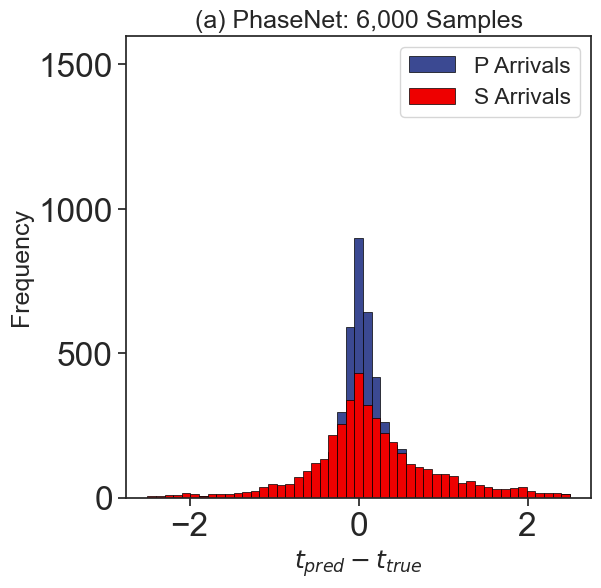

In [16]:
# PhaseNet: 6,000 samples
results_path = "./pred/mackenzie_phasenet/version_3"
split = 'dev'
pred = pd.read_csv(f"{results_path}/{split}_task23.csv")
fig, ax = plt.subplots(figsize=(6, 6))
bins = np.linspace(-2.5, 2.5, 50)


# Plot P arrivals
pred_phase_p = pred[pred["phase_label"] == "P"]
pred_col_p = "p_sample_pred"
diff_p = (pred_phase_p[pred_col_p] - pred_phase_p["phase_onset"]) / pred_phase_p["sampling_rate"]
ax.hist(diff_p, bins=bins, color='#3B4992FF', ec='black', lw=.5, alpha=1.0, label='P Arrivals')
# Plot S arrivals
pred_phase_s = pred[pred["phase_label"] == "S"]
pred_col_s = "s_sample_pred"
diff_s = (pred_phase_s[pred_col_s] - pred_phase_s["phase_onset"]) / pred_phase_s["sampling_rate"]
ax.hist(diff_s, bins=bins, color='#EE0000FF', ec='black', lw=.5, alpha=1.0, label='S Arrivals')
# Set font size
plt.rcParams.update({'font.size': 24})
ax.set_xlabel('$t_{pred} - t_{true}$')
ax.set_ylabel('Frequency')
ax.set_title('(a) PhaseNet: 6,000 Samples')
# Set tick font size
ax.tick_params(axis='both', which='major', labelsize=24)
# set y-axis limit 0 -1600
ax.set_ylim(0, 1600)
# Set legend
ax.legend(loc='upper right')

# Save the figure
plt.savefig('pn_6k_train.png', dpi=500, bbox_inches='tight')
plt.show()


In [20]:
# calculate the accuracy, residual less than 2 sec will be considered as a good pick
good_picks = len(diff_p[abs(diff_p) < 2])
total_picks = len(diff_p)
accuracy = good_picks / total_picks * 100
print(f"P phase accuracy: {accuracy:.0f}% ({good_picks}/{total_picks})")

# calculate the accuracy, residual less than 2 sec will be considered as a good pick
good_picks = len(diff_s[abs(diff_s) < 2])
total_picks = len(diff_s)
accuracy = good_picks / total_picks * 100
print(f"S phase accuracy: {accuracy:.0f}% ({good_picks}/{total_picks})")

P phase accuracy: 96% (4603/4804)
S phase accuracy: 90% (4002/4468)


## PhaseNet: 12,000 samples

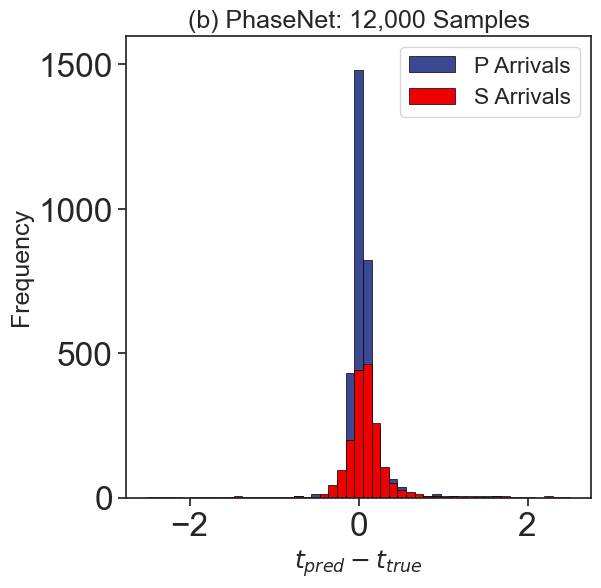

In [28]:
# PhaseNet: 6,000 samples
    
results_path = "./pred/mackenzie_phasenet/version_7"
split = 'dev'
pred = pd.read_csv(f"{results_path}/{split}_task23.csv")
# read P arrivals
pred_phase_p = pred[pred["phase_label"] == "P"]

# read S arrivals
pred = pd.read_csv(f"{results_path}/{split}_task23.csv")
pred_phase_s = pred[pred["phase_label"] == "S"]

fig, ax = plt.subplots(figsize=(6, 6))
bins = np.linspace(-2.5, 2.5, 50)


# Plot P arrivals
#pred_phase_p = pred[pred["phase_label"] == "P"]
pred_col_p = "p_sample_pred"
diff_p = (pred_phase_p[pred_col_p] - pred_phase_p["phase_onset"]) / pred_phase_p["sampling_rate"]
ax.hist(diff_p, bins=bins, color='#3B4992FF', ec='black', lw=.5, alpha=1.0, label='P Arrivals')
# Plot S arrivals

pred_col_s = "s_sample_pred"
diff_s = (pred_phase_s[pred_col_s] - pred_phase_s["phase_onset"]) / pred_phase_s["sampling_rate"]
ax.hist(diff_s, bins=bins, color='#EE0000FF', ec='black', lw=.5, alpha=1.0, label='S Arrivals')
# Set font size
plt.rcParams.update({'font.size': 24})
ax.set_xlabel('$t_{pred} - t_{true}$')
ax.set_ylabel('Frequency')
ax.set_title('(b) PhaseNet: 12,000 Samples')
# Set tick font size
ax.tick_params(axis='both', which='major', labelsize=24)
# set y-axis limit 0 -1600
ax.set_ylim(0, 1600)
# Set legend
ax.legend(loc='upper right')

# Save the figure
plt.savefig('pn_12k_train.png', dpi=500, bbox_inches='tight')
plt.show()


In [29]:
# calculate the accuracy, residual less than 2 sec will be considered as a good pick
good_picks = len(diff_p[abs(diff_p) < 2])
total_picks = len(diff_p)
accuracy = good_picks / total_picks * 100
print(f"P phase accuracy: {accuracy:.0f}% ({good_picks}/{total_picks})")

# calculate the accuracy, residual less than 2 sec will be considered as a good pick
good_picks = len(diff_s[abs(diff_s) < 2])
total_picks = len(diff_s)
accuracy = good_picks / total_picks * 100
print(f"S phase accuracy: {accuracy:.0f}% ({good_picks}/{total_picks})")

P phase accuracy: 98% (3378/3436)
S phase accuracy: 96% (1804/1873)


## EQTransformer: 6,000 samples

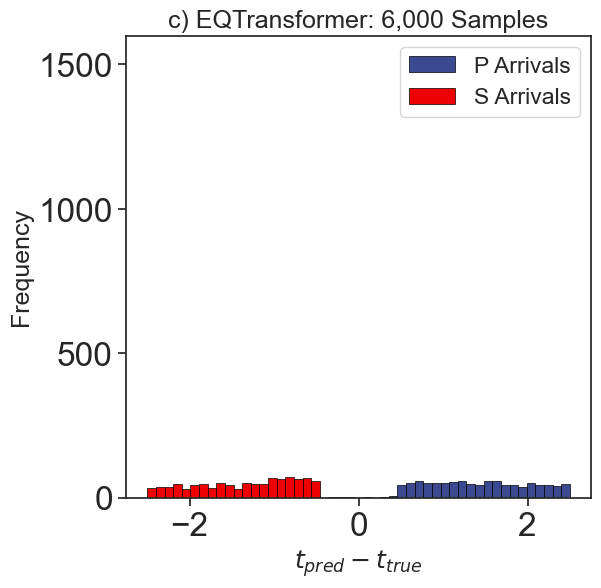

In [24]:

# EQTransformer: 6,000 samples
#
results_path =   "./pred/mackenzie_eqtransformer/version_3"
split = 'dev'
pred = pd.read_csv(f"{results_path}/{split}_task23.csv")
# read P arrivals
pred_phase_p = pred[pred["phase_label"] == "P"]

results_path =   "./pred/mackenzie_eqtransformer/version_3"
# read S arrivals
pred = pd.read_csv(f"{results_path}/{split}_task23.csv")
pred_phase_s = pred[pred["phase_label"] == "S"]

fig, ax = plt.subplots(figsize=(6, 6))
bins = np.linspace(-2.5, 2.5, 50)


# Plot P arrivals
#pred_phase_p = pred[pred["phase_label"] == "P"]
pred_col_p = "p_sample_pred"
diff_p = (pred_phase_p[pred_col_p] - pred_phase_p["phase_onset"]) / pred_phase_p["sampling_rate"]
ax.hist(diff_p, bins=bins, color='#3B4992FF', ec='black', lw=.5, alpha=1.0, label='P Arrivals')
# Plot S arrivals

pred_col_s = "s_sample_pred"
diff_s = (pred_phase_s[pred_col_s] - pred_phase_s["phase_onset"]) / pred_phase_s["sampling_rate"]
ax.hist(diff_s, bins=bins, color='#EE0000FF', ec='black', lw=.5, alpha=1.0, label='S Arrivals')
# Set font size
plt.rcParams.update({'font.size': 24})
ax.set_xlabel('$t_{pred} - t_{true}$')
ax.set_ylabel('Frequency')
ax.set_title('c) EQTransformer: 6,000 Samples')
# Set tick font size
ax.tick_params(axis='both', which='major', labelsize=24)
# set y-axis limit 0 -1600
ax.set_ylim(0, 1600)
# Set legend
ax.legend(loc='upper right')

# Save the figure
plt.savefig('eqt_less_train.png', dpi=500, bbox_inches='tight')
plt.show()

In [25]:
# calculate the accuracy, residual less than 2 sec will be considered as a good pick
good_picks = len(diff_p[abs(diff_p) < 2])
total_picks = len(diff_p)
accuracy = good_picks / total_picks * 100
print(f"P phase accuracy: {accuracy:.0f}% ({good_picks}/{total_picks})")

# calculate the accuracy, residual less than 2 sec will be considered as a good pick
good_picks = len(diff_s[abs(diff_s) < 2])
total_picks = len(diff_s)
accuracy = good_picks / total_picks * 100
print(f"S phase accuracy: {accuracy:.0f}% ({good_picks}/{total_picks})")

P phase accuracy: 25% (855/3436)
S phase accuracy: 42% (791/1873)


## EQTransformer: 12,000 samples

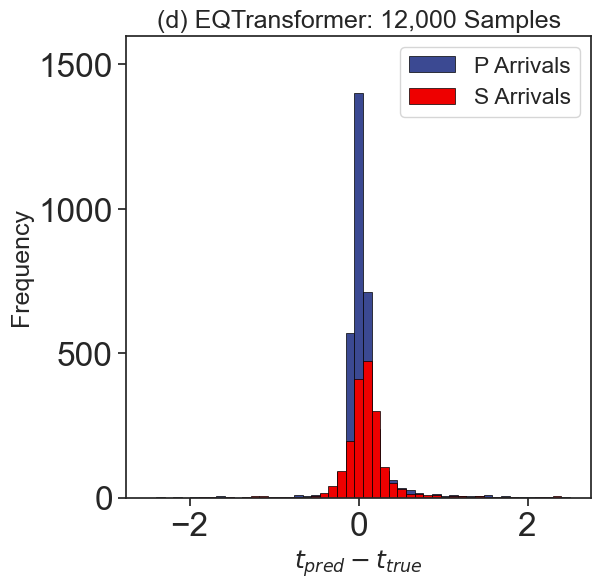

In [30]:
# EQTransformer: 12,000 samples
#    
results_path =  "./pred/mackenzie_eqtransformer/version_0"
split = 'dev'
pred = pd.read_csv(f"{results_path}/{split}_task23.csv")
# read P arrivals
pred_phase_p = pred[pred["phase_label"] == "P"]

results_path = "./pred/mackenzie_eqtransformer/version_0"
# read S arrivals
pred = pd.read_csv(f"{results_path}/{split}_task23.csv")
pred_phase_s = pred[pred["phase_label"] == "S"]

fig, ax = plt.subplots(figsize=(6, 6))
bins = np.linspace(-2.5, 2.5, 50)


# Plot P arrivals
#pred_phase_p = pred[pred["phase_label"] == "P"]
pred_col_p = "p_sample_pred"
diff_p = (pred_phase_p[pred_col_p] - pred_phase_p["phase_onset"]) / pred_phase_p["sampling_rate"]
ax.hist(diff_p, bins=bins, color='#3B4992FF', ec='black', lw=.5, alpha=1.0, label='P Arrivals')
# Plot S arrivals

pred_col_s = "s_sample_pred"
diff_s = (pred_phase_s[pred_col_s] - pred_phase_s["phase_onset"]) / pred_phase_s["sampling_rate"]
ax.hist(diff_s, bins=bins, color='#EE0000FF', ec='black', lw=.5, alpha=1.0, label='S Arrivals')
# Set font size
plt.rcParams.update({'font.size': 24})
ax.set_xlabel('$t_{pred} - t_{true}$')
ax.set_ylabel('Frequency')
ax.set_title('(d) EQTransformer: 12,000 Samples')
# Set tick font size
ax.tick_params(axis='both', which='major', labelsize=24)
# set y-axis limit 0 -1600
ax.set_ylim(0, 1600)
# Set legend
ax.legend(loc='upper right')

# Save the figure
plt.savefig('eqt_more_train.png', dpi=500, bbox_inches='tight')
plt.show()


In [31]:
# calculate the accuracy, residual less than 2 sec will be considered as a good pick
good_picks = len(diff_p[abs(diff_p) < 2])
total_picks = len(diff_p)
accuracy = good_picks / total_picks * 100
print(f"P phase accuracy: {accuracy:.0f}% ({good_picks}/{total_picks})")

# calculate the accuracy, residual less than 2 sec will be considered as a good pick
good_picks = len(diff_s[abs(diff_s) < 2])
total_picks = len(diff_s)
accuracy = good_picks / total_picks * 100
print(f"S phase accuracy: {accuracy:.0f}% ({good_picks}/{total_picks})")

P phase accuracy: 98% (3371/3436)
S phase accuracy: 97% (1820/1873)
